In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# 평균 4, 표준편차 0.8인 정규분포를 띠르는 모집자
population = stats.norm(loc=4, scale=0.8)

# 표본 평균을 10000개 얻기
## population.rvs(size=10) : pop~ 변수에 있는 값 10개만 줘바

sample_mean_array = np.zeros(10000)
np.random.seed(13)
for i in range(0,10000):
    sample = population.rvs(size=10)
    sample_mean_array[i] = np.mean(sample)

print(sample_mean_array)

[4.3976666  4.18857764 3.8425394  ... 4.12495865 4.12127892 4.05054023]


In [9]:
# 평균 : 4와 비슷해!
np.mean(sample_mean_array)

# 표준편차, 분산은 갯수가 작아서...
np.std(sample_mean_array), np.std(sample_mean_array, ddof=1)


(0.25328735533634056, 0.25330002065401414)

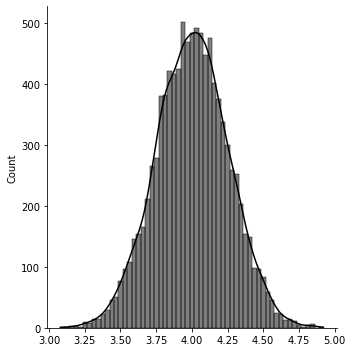

In [10]:
# 디스토그램 그리기
sns.displot(sample_mean_array, color='black', kde=True)

In [11]:
# 샘플사이즈 다양하게 만들기
size_array = np.arange(10,100100,100) #10부터 100단위로 100000까지 나타나게 됨.
sample_mean_array_size = np.zeros(len(size_array))

In [12]:
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

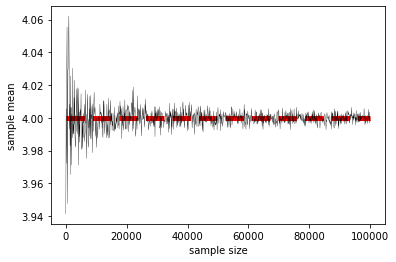

In [20]:
plt.plot(size_array, sample_mean_array_size, color = 'black', lw=0.3)
plt.hlines(4, 0, 100000, colors='red', linestyles='dashed', lw=5) 
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.show()

In [21]:
# 평균을 계산하는 함수
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)

    for i in range(0, n_trial):
        sample = population.rvs(size=size)
        sample_mean_array[i] = np.mean(sample)

    return(sample_mean_array)

In [22]:
# 다양한 샘플 사이즈 준비
size_array = np.arange(2, 102, 2)

In [23]:
# 샘플 사이즈별로 표준편차 계산
sample_mean_std_array = np.zeros(len(size_array))
np.random.seed(13)

for i in range(0, len(size_array)): 
    sample_mean = calc_sample_mean(size=size_array[i], n_trial=100)
    sample_mean_std_array[i] = np.std(sample_mean, ddof=1)

Text(0, 0.5, 'mean_std value')

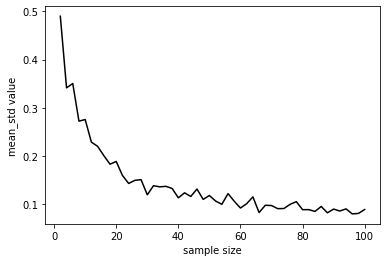

In [25]:
plt.plot(size_array, sample_mean_std_array, color='black')
plt.xlabel("sample size")
plt.ylabel("mean_std value")

---

In [28]:
# 표준오차
SE = 0.8/np.sqrt(size_array)
SE

array([0.56568542, 0.4       , 0.32659863, 0.28284271, 0.25298221,
       0.23094011, 0.21380899, 0.2       , 0.18856181, 0.17888544,
       0.17056057, 0.16329932, 0.15689291, 0.15118579, 0.14605935,
       0.14142136, 0.13719887, 0.13333333, 0.12977714, 0.12649111,
       0.12344268, 0.12060454, 0.11795356, 0.11547005, 0.11313708,
       0.11094004, 0.10886621, 0.1069045 , 0.10504515, 0.10327956,
       0.1016001 , 0.1       , 0.09847319, 0.09701425, 0.09561829,
       0.0942809 , 0.09299811, 0.09176629, 0.09058216, 0.08944272,
       0.08834522, 0.08728716, 0.08626622, 0.08528029, 0.0843274 ,
       0.08340577, 0.0825137 , 0.08164966, 0.0808122 , 0.08      ])

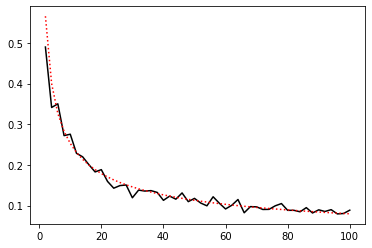

In [30]:
plt.plot(size_array, sample_mean_std_array, color='black')
plt.plot(size_array, SE, color='red', ls='dotted')

In [35]:
# 표본분산의 평균값은 모분산과 차이가 있다.
sample_var_array = np.zeros(10000)
np.random.seed(13)
for i in range(0,10000):
    sample = population.rvs(size=10)
    sample_var_array[i] = np.var(sample, ddof=0)

np.mean(sample_var_array) #0.64와 다른 값

0.5792337629333761

In [34]:
# 불편분산으로 동일하게 계산
unbios_var_array = np.zeros(10000)
np.random.seed(13)
for i in range(0,10000):
    sample = population.rvs(size=10)
    unbios_var_array[i] = np.var(sample, ddof=1) #불편분산!

np.mean(unbios_var_array) #0.64와 거의 비슷한 값

0.6435930699259735

In [40]:
# 다양한 크기 샘플 준비
size_array = np.arange(10, 100100, 100)

# 불편분산을 사이즈별로 구하고
unbios_var_array = np.zeros(len(size_array))
np.random.seed(13)

for i in range(0, len(size_array)): 
    sample = population.rvs(size=size_array[i])
    unbios_var_array[i] = np.var(sample, ddof=1)

unbios_var_array

array([0.47982657, 0.54672273, 0.57905633, ..., 0.63441806, 0.63886466,
       0.64194483])

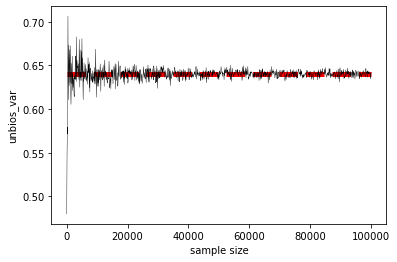

In [45]:
plt.plot(size_array, unbios_var_array, color = 'black', lw=0.4)
plt.hlines(0.64, 0, 100000, colors='red', linestyles='dashed', lw=5) 
plt.xlabel('sample size')
plt.ylabel('unbios_var')
plt.show()